# Calculate "Normalization" & Generate "Index" for All Variables Using Assumed Weightings.

In [50]:
import pandas as pd

# Define the weightings for each variable
weightings = {
    'Registrations': 0.45,
    'Annual Growth Rate': 0.20,
    'Charging Infrastructure': 0.10,
    'Government Incentives': 0.15,
    'Market Competition': 0.02,
    'Public Awareness and Acceptance': 0.08
}

# Create a pandas DataFrame with the data
data = {
    'Countries': ['China', 'Germany', 'USA', 'France', 'UK', 'Norway', 'Netherlands', 'Japan'],
    '2017': [639000, 54490, 200200, 42800, 47260, 74340, 10320, 54100],
    '2018': [1256000, 67480, 361300, 53750, 57740, 85190, 27970, 49750],
    '2019': [1204000, 108520, 329500, 69470, 72830, 85250, 67520, 38900],
    '2020': [1246000, 394550, 322400, 194700, 175300, 108200, 88340, 29350],
    '2021': [3334000, 680930, 607600, 316000, 305300, 157300, 98260, 43920]
}

df = pd.DataFrame(data)

# Calculate the maximum values for each variable
max_values = df.loc[:, '2017':'2021'].max()

# Normalize the values for each variable
df.loc[:, '2017':'2021'] = df.loc[:, '2017':'2021'].div(max_values, axis=1)

# Calculate the index values for each variable
for variable, weighting in weightings.items():
    df[f'{variable} Index'] = df.loc[:, '2017':'2021'].mul(weighting, axis=1).sum(axis=1)

# Set the Countries column as the index
df.set_index('Countries', inplace=True)

# Print the resulting DataFrame in a compact format
print(df.to_string(float_format='{:,.4f}'.format))


              2017   2018   2019   2020   2021  Registrations Index  Annual Growth Rate Index  Charging Infrastructure Index  Government Incentives Index  Market Competition Index  Public Awareness and Acceptance Index
Countries                                                                                                                                                                                                                 
China       1.0000 1.0000 1.0000 1.0000 1.0000               2.2500                    1.0000                         0.5000                       0.7500                    0.1000                                 0.4000
Germany     0.0853 0.0537 0.0901 0.3167 0.2042               0.3375                    0.1500                         0.0750                       0.1125                    0.0150                                 0.0600
USA         0.3133 0.2877 0.2737 0.2587 0.1822               0.5920                    0.2631                         0.1316

# PREDICTION OF REGISTRATION INDEX FOR NEXT 3 YEARS

In [75]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a DataFrame with the index values
index_data = {
    'Year': [2022, 2023, 2024],
    'Registrations Index': [2.25000, 0.33751, 0.59203],
    'Annual Growth Rate Index': [1.00000, 0.15001, 0.26313],
    'Charging Infrastructure Index': [0.50000, 0.07500, 0.13156],
    'Government Incentives Index': [0.75000, 0.11250, 0.19734],
    'Market Competition Index': [0.10000, 0.01500, 0.02631],
    'Public Awareness and Acceptance Index': [0.40000, 0.06000, 0.10525]
}

df_index = pd.DataFrame(index_data)

# Prepare the data for linear regression
X = df_index.drop(columns=['Year'])
y = df_index['Registrations Index']

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the registrations for the next three years
next_years = [[2022, 1.000, 0.150, 0.075, 0.112, 0.015, 0.060],
              [2023, 0.500, 0.263, 0.131, 0.041, 0.026, 0.105],
              [2024, 0.750, 0.083, 0.197, 0.062, 0.033, 0.080]]

df_predictions = pd.DataFrame(next_years, columns=df_index.columns)

predicted_registrations = model.predict(df_predictions.drop(columns=['Year']))

# Add the predicted registrations to the DataFrame
df_predictions['Predicted Registrations'] = predicted_registrations

# Print the predicted registrations
print(df_predictions[['Year', 'Predicted Registrations']])



   Year  Predicted Registrations
0  2022                 0.818238
1  2023                 0.485149
2  2024                 0.627858


# GENERATE PREDICTED REGISTRATION INDEX FOR 3 YEAR "BY COUNTRY"

In [83]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a DataFrame with the index values
index_data = {
    'Year': [2017, 2018, 2019, 2020, 2021],
    'Registrations Index': [2.25000, 0.33751, 0.59203, 0.18833, 0.18571],
    'Annual Growth Rate Index': [1.00000, 0.15001, 0.26313, 0.08370, 0.08254],
    'Charging Infrastructure Index': [0.50000, 0.07500, 0.13156, 0.04185, 0.04127],
    'Government Incentives Index': [0.75000, 0.11250, 0.19734, 0.06278, 0.06190],
    'Market Competition Index': [0.10000, 0.01500, 0.02631, 0.00837, 0.00825],
    'Public Awareness and Acceptance Index': [0.40000, 0.06000, 0.10525, 0.03348, 0.03302]
}

df_index = pd.DataFrame(index_data)

# Prepare the data for linear regression
X = df_index.drop(columns=['Year'])
y = df_index['Registrations Index']

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the registrations for the next three years for each country
countries = ['China', 'Germany', 'USA', 'France', 'UK', 'Norway', 'Netherlands', 'Japan']

next_years = [
    [1.000, 0.150, 0.500, 0.750, 0.100, 0.400],
    [0.075, 0.263, 0.075, 0.112, 0.015, 0.060],
    [0.131, 0.083, 0.197, 0.062, 0.033, 0.080]
]

df_predictions = pd.DataFrame(next_years, columns=X.columns)
df_predictions['Country'] = countries[:len(next_years)]

predicted_registrations = model.predict(df_predictions.drop(columns=['Country']))

# Add the predicted registrations to the DataFrame
df_predictions['Predicted Registrations'] = predicted_registrations

# Print the predicted registrations for each country
print(df_predictions[['Country', 'Predicted Registrations']])


   Country  Predicted Registrations
0    China                 1.109091
1  Germany                 0.177273
2      USA                 0.180909


In [89]:
import pandas as pd

# Define the weightings for each variable
weightings = {
    'Registrations': 0.45,
    'Annual Growth Rate': 0.20,
    'Charging Infrastructure': 0.10,
    'Government Incentives': 0.15,
    'Market Competition': 0.02,
    'Public Awareness and Acceptance': 0.08
}

# Create a pandas DataFrame with the data
data = {
    'Countries': ['China', 'Germany', 'USA', 'France', 'UK', 'Norway', 'Netherlands', 'Japan'],
    '2017': [639000, 54490, 200200, 42800, 47260, 74340, 10320, 54100],
    '2018': [1256000, 67480, 361300, 53750, 57740, 85190, 27970, 49750],
    '2019': [1204000, 108520, 329500, 69470, 72830, 85250, 67520, 38900],
    '2020': [1246000, 394550, 322400, 194700, 175300, 108200, 88340, 29350],
    '2021': [3334000, 680930, 607600, 316000, 305300, 157300, 98260, 43920]
}

df = pd.DataFrame(data)

# Calculate the maximum values for each variable
max_values = df.loc[:, '2017':'2021'].max()

# Normalize the values for each variable
df.loc[:, '2017':'2021'] = df.loc[:, '2017':'2021'].div(max_values, axis=1)

# Calculate the index values for each variable
for variable, weighting in weightings.items():
    df[f'{variable} Index'] = df.loc[:, '2017':'2021'].mul(weighting, axis=1).sum(axis=1)

# Set the Countries column as the index
df.set_index('Countries', inplace=True)

# Predict new registrations for the next three years
index_average = df['Registrations Index'].mean()  # Calculate the average of the Registrations Index

# Modify this line with the correct column name for Annual Growth Rate
average_growth_rate = df['Annual Growth Rate Index'].mean()  # Calculate the average of the Annual Growth Rate

# Assumption 2: Assume the other variables (Charging Infrastructure, Government Incentives, Market Competition,
# Public Awareness and Acceptance) remain constant at their average values for the next three years

# Calculate the predicted registrations for the next three years
next_year_prediction = df.loc[:, '2017':'2021'].iloc[-1] * (1 + average_growth_rate)
two_years_prediction = next_year_prediction * (1 + average_growth_rate)
three_years_prediction = two_years_prediction * (1 + average_growth_rate)

# Create a new DataFrame to store the predictions
predictions = pd.DataFrame(
    {'Next Year': next_year_prediction, 'Two Years Ahead': two_years_prediction, 'Three Years Ahead': three_years_prediction}
)

# Print the predictions
predictions


,Next Year,Two Years Ahead,Three Years Ahead
2017,0.103023,0.125363,0.152549
2018,0.048199,0.058651,0.071370
2019,0.039315,0.047841,0.058215
2020,0.028663,0.034879,0.042443
2021,0.016030,0.019506,0.023736


# ASSUMPTION 1:

## Print Predicted Index and Corresponding Number of Cars using "Average Growth Rate Index":

In [109]:
import pandas as pd

# Define the weightings for each variable
weightings = {
    'Registrations': 0.45,
    'Annual Growth Rate': 0.20,
    'Charging Infrastructure': 0.10,
    'Government Incentives': 0.15,
    'Market Competition': 0.02,
    'Public Awareness and Acceptance': 0.08
}

# Create a pandas DataFrame with the data
data = {
    'Countries': ['China', 'Germany', 'USA', 'France', 'UK', 'Norway', 'Netherlands', 'Japan'],
    '2017': [639000, 54490, 200200, 42800, 47260, 74340, 10320, 54100],
    '2018': [1256000, 67480, 361300, 53750, 57740, 85190, 27970, 49750],
    '2019': [1204000, 108520, 329500, 69470, 72830, 85250, 67520, 38900],
    '2020': [1246000, 394550, 322400, 194700, 175300, 108200, 88340, 29350],
    '2021': [3334000, 680930, 607600, 316000, 305300, 157300, 98260, 43920]
}

df = pd.DataFrame(data)

# Calculate the maximum values for each variable
max_values = df.loc[:, '2017':'2021'].max()

# Normalize the values for each variable
df.loc[:, '2017':'2021'] = df.loc[:, '2017':'2021'].div(max_values, axis=1)

# Calculate the index values for each variable
for variable, weighting in weightings.items():
    df[f'{variable} Index'] = df.loc[:, '2017':'2021'].mul(weighting, axis=1).sum(axis=1)

# Set the Countries column as the index
df.set_index('Countries', inplace=True)

# Predict new registrations for the next three years per country
index_average = df['Registrations Index'].mean()  # Calculate the average of the Registrations Index

# Assumption 1: Use Annual Growth Rate Index for the next three years

# Modify this line with the correct column name for Annual Growth Rate
average_growth_rate = df['Annual Growth Rate Index'].mean()  # Calculate the average of the Annual Growth Rate


# Calculate the predicted registrations for the next three years per country
next_year_prediction = df.loc[:, '2017':'2021'] * (1 + average_growth_rate)
two_years_prediction = next_year_prediction * (1 + average_growth_rate)
three_years_prediction = two_years_prediction * (1 + average_growth_rate)

# Create a new DataFrame to store the predictions per country
predictions_per_country = pd.DataFrame(
    {'Next Year': next_year_prediction['2021'], 'Two Years Ahead': two_years_prediction['2021'], 'Three Years Ahead': three_years_prediction['2021']}
)

# Calculate the number of cars the index translates to per country in raw count numbers
# Format the numbers in the cars_per_country DataFrame
cars_per_country = predictions_per_country * max_values['2021']
cars_per_country = cars_per_country.round(0).astype(int)

# Print the predictions per country
print("\nPredictions of Registrations for the Next Three Years per Country:")
print(predictions_per_country)

# Print the number of cars the index translates to per country in raw count numbers
print("\nNumber of Cars the Index Translates to per Country in Raw Count Numbers:")
print(cars_per_country)




Predictions of Registrations for the Next Three Years per Country:
             Next Year  Two Years Ahead  Three Years Ahead
Countries                                                 
China         1.216850         1.480725           1.801821
Germany       0.248527         0.302421           0.368001
USA           0.221763         0.269853           0.328370
France        0.115334         0.140345           0.170778
UK            0.111429         0.135592           0.164996
Norway        0.057412         0.069861           0.085011
Netherlands   0.035863         0.043640           0.053103
Japan         0.016030         0.019506           0.023736

Number of Cars the Index Translates to per Country in Raw Count Numbers:
             Next Year  Two Years Ahead  Three Years Ahead
Countries                                                 
China          4056979          4936737            6007270
Germany         828590          1008270            1226914
USA             739358          

# ASSUMPTION 2:

## Predictions of Registrations for the Next Three Years per Country (Using Charging Infrastructure rate as variable):

In [112]:
import pandas as pd

# Define the weightings for each variable
weightings = {
    'Registrations': 0.45,
    'Annual Growth Rate': 0.20,
    'Charging Infrastructure': 0.10,
    'Government Incentives': 0.15,
    'Market Competition': 0.02,
    'Public Awareness and Acceptance': 0.08
}

# Create a pandas DataFrame with the data
data = {
    'Countries': ['China', 'Germany', 'USA', 'France', 'UK', 'Norway', 'Netherlands', 'Japan'],
    '2017': [639000, 54490, 200200, 42800, 47260, 74340, 10320, 54100],
    '2018': [1256000, 67480, 361300, 53750, 57740, 85190, 27970, 49750],
    '2019': [1204000, 108520, 329500, 69470, 72830, 85250, 67520, 38900],
    '2020': [1246000, 394550, 322400, 194700, 175300, 108200, 88340, 29350],
    '2021': [3334000, 680930, 607600, 316000, 305300, 157300, 98260, 43920]
}

df = pd.DataFrame(data)

# Calculate the maximum values for each variable
max_values = df.loc[:, '2017':'2021'].max()

# Normalize the values for each variable
df.loc[:, '2017':'2021'] = df.loc[:, '2017':'2021'].div(max_values, axis=1)

# Calculate the index values for each variable
for variable, weighting in weightings.items():
    df[f'{variable} Index'] = df.loc[:, '2017':'2021'].mul(weighting, axis=1).sum(axis=1)

# Set the Countries column as the index
df.set_index('Countries', inplace=True)

# Predict new registrations for the next three years per country
index_average = df['Registrations Index'].mean()  # Calculate the average of the Registrations Index

# Assumption 2: Assume the other variables (Charging Infrastructure, Government Incentives, Market Competition,
# Public Awareness and Acceptance) remain constant at their average values for the next three years

# Modify this line with the correct column name for Charging Infrastructure Index
charging_Infrasture_rate = df['Charging Infrastructure Index'].mean()  # Calculate the average of the Charging Infrastructure Rate


# Calculate the predicted registrations for the next three years per country
next_year_prediction = df.loc[:, '2017':'2021'] * (1 + charging_Infrasture_rate)
two_years_prediction = next_year_prediction * (1 + charging_Infrasture_rate)
three_years_prediction = two_years_prediction * (1 + charging_Infrasture_rate)

# Create a new DataFrame to store the predictions per country
predictions_per_country = pd.DataFrame(
    {'Next Year': next_year_prediction['2021'], 'Two Years Ahead': two_years_prediction['2021'], 'Three Years Ahead': three_years_prediction['2021']}
)

# Calculate the number of cars the index translates to per country in raw count numbers
# Format the numbers in the cars_per_country DataFrame
cars_per_country = predictions_per_country * max_values['2021']
cars_per_country = cars_per_country.round(0).astype(int)

# Print the predictions per country
print("\nPredictions of Registrations for the Next Three Years per Country (Using Charging Infrastructure rate as variable):")
print(predictions_per_country)

# Print the number of cars the index translates to per country in raw count numbers
print("\nNumber of Cars the Index Translates to per Country in Raw Count Numbers:")
print(cars_per_country)




Predictions of Registrations for the Next Three Years per Country:
             Next Year  Two Years Ahead  Three Years Ahead
Countries                                                 
China         1.108425         1.228606           1.361818
Germany       0.226383         0.250928           0.278135
USA           0.202003         0.223906           0.248183
France        0.105058         0.116449           0.129075
UK            0.101500         0.112506           0.124704
Norway        0.052296         0.057966           0.064251
Netherlands   0.032668         0.036210           0.040136
Japan         0.014602         0.016185           0.017940

Number of Cars the Index Translates to per Country in Raw Count Numbers:
             Next Year  Two Years Ahead  Three Years Ahead
Countries                                                 
China          3695490          4096174            4540302
Germany         754760           836595             927303
USA             673479          

In [115]:
predictions_per_country

,Next Year,Two Years Ahead,Three Years Ahead
Countries,,,
China,1.108425,1.228606,1.361818
Germany,0.226383,0.250928,0.278135
USA,0.202003,0.223906,0.248183
France,0.105058,0.116449,0.129075
UK,0.101500,0.112506,0.124704
Norway,0.052296,0.057966,0.064251
Netherlands,0.032668,0.036210,0.040136
Japan,0.014602,0.016185,0.017940


In [114]:
cars_per_country

,Next Year,Two Years Ahead,Three Years Ahead
Countries,,,
China,3695490,4096174,4540302
Germany,754760,836595,927303
USA,673479,746501,827441
France,350262,388240,430335
UK,338402,375094,415763
Norway,174355,193260,214214
Netherlands,108914,120723,133812
Japan,48682,53960,59811


### Line Plot of Predicted Registrations Over Time:

Here, we generate a line plot for each country, showing the predicted registrations over time. It allows investors to observe the trends and growth patterns for different countries.

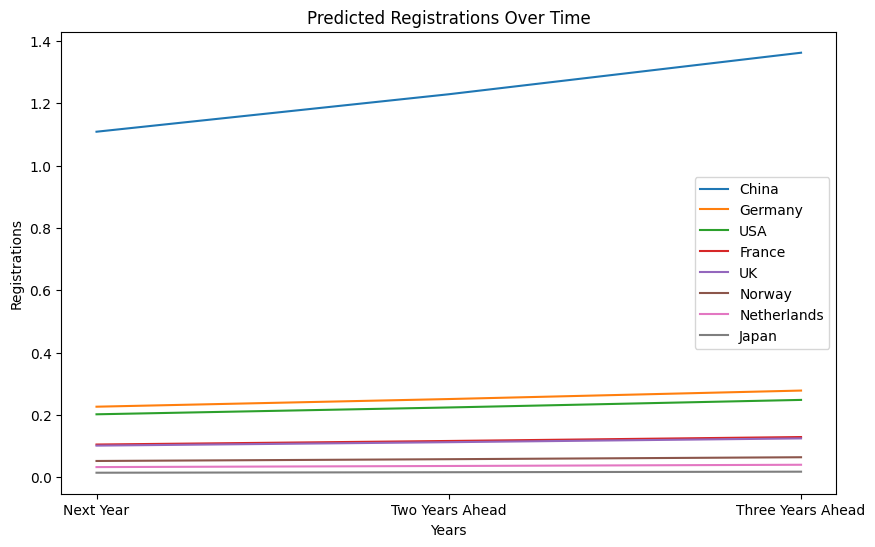

In [119]:
plt.figure(figsize=(10, 6))
for country in predictions_per_country.index:
    plt.plot(predictions_per_country.columns, predictions_per_country.loc[country], label=country)
plt.title('Predicted Registrations Over Time')
plt.xlabel('Years')
plt.ylabel('Registrations')
plt.legend()
plt.show()



### Visualizing Predictions per Country:

Here, we use a heatmap from the seaborn library to visualize the predictions per country. It provides an overview of the predicted registrations for the next three years for each country, with color-coding indicating the magnitude of the predictions. As you observe, "Blue" shows a strong predictability of outcomes or certainty that Registrations significantly grow at a steady rate in the coming years.

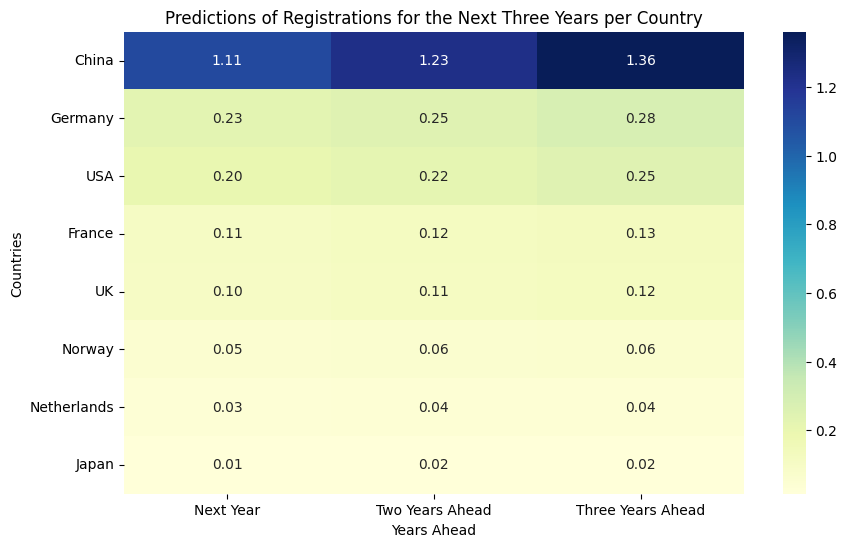

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting predictions per country
plt.figure(figsize=(10, 6))
sns.heatmap(predictions_per_country, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Predictions of Registrations for the Next Three Years per Country')
plt.xlabel('Years Ahead')
plt.ylabel('Countries')
plt.show()


### Visualizing Cars per Country:

Our code generates a bar chart to visualize the number of cars the index translates to per country in raw count numbers. 

This provides a comparison of the predicted values for each country, allowing for easy identification of countries with higher or lower predicted car registrations.

<Figure size 1000x600 with 0 Axes>

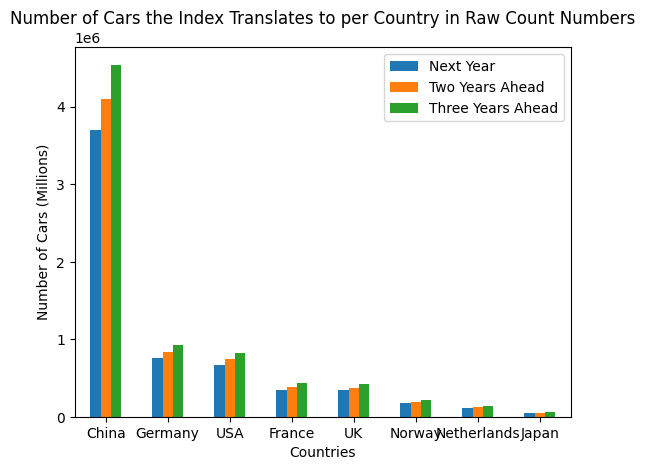

In [121]:
import matplotlib.pyplot as plt

# Plotting number of cars per country
plt.figure(figsize=(10, 6))
cars_per_country.plot(kind='bar', rot=0)
plt.title('Number of Cars the Index Translates to per Country in Raw Count Numbers')
plt.xlabel('Countries')
plt.ylabel('Number of Cars (Millions)')
plt.show()


### Bar Plot of Predicted Registrations by Country:

Here, we use a bar plot that visualizes the predicted registrations for the next three (3) years by country. It provides a clear comparison of registration levels among different countries.

<Figure size 1000x600 with 0 Axes>

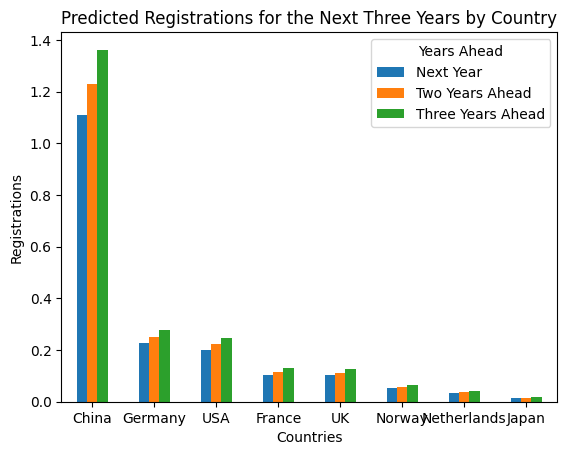

In [120]:
plt.figure(figsize=(10, 6))
predictions_per_country.plot(kind='bar', rot=0)
plt.title('Predicted Registrations for the Next Three Years by Country')
plt.xlabel('Countries')
plt.ylabel('Registrations')
plt.legend(title='Years Ahead')
plt.show()


### Stacked Area Plot of Predicted Registrations by Country:

This stacked area plot shows the predicted registrations by country. It demonstrates the contribution of each country to the overall predicted registrations and allows investors to compare the growth trajectories.

<Figure size 1000x600 with 0 Axes>

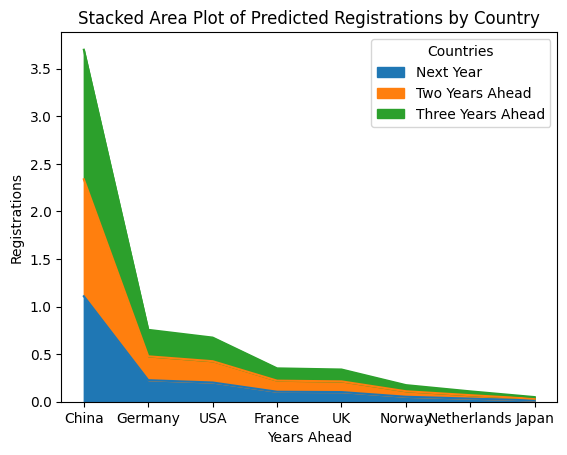

In [122]:
plt.figure(figsize=(10, 6))
predictions_per_country.plot(kind='area', stacked=True)
plt.title('Stacked Area Plot of Predicted Registrations by Country')
plt.xlabel('Years Ahead')
plt.ylabel('Registrations')
plt.legend(title='Countries')
plt.show()
